<a href="https://colab.research.google.com/github/Calista-F/CCSN-gravitational-wave-denoising/blob/main/20220209_Wavelet_runthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd
from math import log10, sqrt
import cv2
import numpy as np

In [2]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, max_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [37]:
def get_min_rmse(df):
  return df[df['RMSE'] == df['RMSE'].min()]

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VB7SaGWtdRc8lsV4EXCRuQfwXWYLnf8KbMgmsqezgZs/edit#gid=1342867710')
worksheet = repo.worksheet('CCSN_signal60_dist5.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

###Table 1. Denoising results for the CCSN signal s20a1o05 at a distance of 5 kpc (SNR = 3.9 dB).

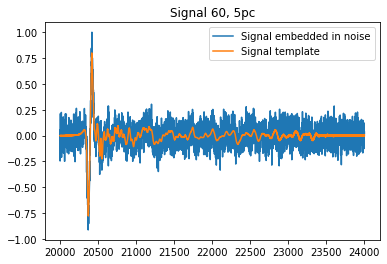

In [5]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 60, 5pc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for table 1

In [6]:
#pywt.wavelist()

In [21]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym5','db13','coif1']
sym_wavelets = ['sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',
 'sym14',
 'sym15',
 'sym16',
 'sym17',
 'sym18',
 'sym19',
 'sym20']

db_wavelets = ['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

coif_wavelets = [ 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',]
levels = np.arange(1,7,1)
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 60'
signaldistance = '5 kpc'

In [8]:
np.arange(1,7,1)[0]

1

Create a main list that appends each line and each metric result

In [22]:
main_list = []

for m in methods:
  cols = []
  for i in range(len(sym_wavelets)):
    for l in range(len(levels)):
      #Make a dataframe for the denoised signal of the noisy normalized signal
      denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = sym_wavelets[i], wavelet_levels = levels[l], rescale_sigma = 'True'))
      
      #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
      col1 = [str(m).upper() +', '+ sym_wavelets[i] + ' level ' + str(levels[l])] 
      col1.append(get_rmse(signal_norm_df, denoised_df))
      col1.append(mean_absolute_error(signal_norm_df, denoised_df))
      col1.append(max_error(signal_norm_df, denoised_df))

      #append this column to cols- a list of columns for the table 
      cols.append(col1)
  main_list.append(cols)

  main_array = np.array(main_list)

In [10]:
main_array.shape

(2, 114, 4)

In [11]:
def denoising_metrics(wavelet_family, max_level):

  main_list = []
  for m in methods:
    cols = []
    for i in range(len(wavelet_family)):
      for l in range(len(np.arange(1,max_level,1))):
        #Make a dataframe for the denoised signal of the noisy normalized signal
        denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelet_family[i], wavelet_levels = np.arange(1,max_level,1)[l], rescale_sigma = 'True'))
        
        #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
        col1 = [str(m).upper() +', '+ wavelet_family[i] + ' level ' + str(levels[l])] 
        col1.append(get_rmse(signal_norm_df, denoised_df))
        col1.append(mean_absolute_error(signal_norm_df, denoised_df))
        col1.append(max_error(signal_norm_df, denoised_df))

        #append this column to cols- a list of columns for the table 
        cols.append(col1)
    main_list.append(cols)
  return np.array(main_list)

In [12]:
symlet_array = denoising_metrics(sym_wavelets, 7)

In [13]:
symlet_array.shape

(2, 114, 4)

In [14]:
BayesSymdf = pd.DataFrame(data = symlet_array[0,:,1:], columns = metrics, index = symlet_array[0,:,0])
BayesSymdf

,RMSE,MAE,MAX
"BAYESSHRINK, sym2 level 1",0.05316535497341097,0.0415655589989924,0.2221908334482586
"BAYESSHRINK, sym2 level 2",0.03824703850438261,0.02976375744816868,0.18437333255367028
"BAYESSHRINK, sym2 level 3",0.028020391187656715,0.02193177103959811,0.11078855626910847
"BAYESSHRINK, sym2 level 4",0.02414279371137229,0.01815566788476583,0.17979080149921434
"BAYESSHRINK, sym2 level 5",0.02397246452730569,0.017809045685560354,0.1797908014984847
...,...,...,...
"BAYESSHRINK, sym20 level 2",0.03826108518690651,0.03050556354286796,0.1411544362796514
"BAYESSHRINK, sym20 level 3",0.027474888802014475,0.02227166400245248,0.10036647908785376
"BAYESSHRINK, sym20 level 4",0.02105881293344999,0.01674360574315346,0.07498273796469035
"BAYESSHRINK, sym20 level 5",0.01986247209367094,0.015433874648097758,0.0715494368935797


In [38]:
get_min_rmse(BayesSymdf)

,RMSE,MAE,MAX
"BAYESSHRINK, sym11 level 6",0.019608562078927076,0.014739857140509991,0.08761718219215381


In [15]:
VisuSymdf = pd.DataFrame(data = symlet_array[1,:,1:], columns = metrics, index = symlet_array[1,:,0])
VisuSymdf

,RMSE,MAE,MAX
"VISUSHRINK, sym2 level 1",0.05316535497341097,0.0415655589989924,0.2221908334482586
"VISUSHRINK, sym2 level 2",0.03824703850438261,0.02976375744816868,0.18437333255367028
"VISUSHRINK, sym2 level 3",0.028020391187656715,0.02193177103959811,0.11078855626910847
"VISUSHRINK, sym2 level 4",0.02414279371137229,0.01815566788476583,0.17979080149921434
"VISUSHRINK, sym2 level 5",0.024731663042899425,0.01711092002779949,0.1797908014984847
...,...,...,...
"VISUSHRINK, sym20 level 2",0.03826108518690651,0.03050556354286796,0.1411544362796514
"VISUSHRINK, sym20 level 3",0.027474888802014475,0.02227166400245248,0.10036647908785376
"VISUSHRINK, sym20 level 4",0.02105881293344999,0.01674360574315346,0.07498273796469035
"VISUSHRINK, sym20 level 5",0.021449102405883647,0.01537959240035523,0.10985031707730089


In [39]:
get_min_rmse(VisuSymdf)

,RMSE,MAE,MAX
"VISUSHRINK, sym10 level 5",0.018759902339265548,0.014331134696514352,0.07482735476237246


In [16]:
db_array = denoising_metrics(db_wavelets,6)

In [17]:
db_array.shape

(2, 190, 4)

In [18]:
BayesDbdf = pd.DataFrame(data = db_array[0,:,1:], columns = metrics, index = db_array[0,:,0])
BayesDbdf

,RMSE,MAE,MAX
"BAYESSHRINK, db1 level 1",0.05372492531134338,0.042841333777091144,0.20713298791019003
"BAYESSHRINK, db1 level 2",0.03928057942087795,0.031305465067239246,0.14088946459412774
"BAYESSHRINK, db1 level 3",0.030780944855444227,0.0240906470964297,0.17644645941278053
"BAYESSHRINK, db1 level 4",0.025222885566960066,0.018762862073773447,0.17644645941278053
"BAYESSHRINK, db1 level 5",0.025033636783562938,0.018452070716129264,0.17644645941278053
...,...,...,...
"BAYESSHRINK, db38 level 1",0.05359947557759974,0.04281621297571882,0.207911216636896
"BAYESSHRINK, db38 level 2",0.03835991653523385,0.030662032084768975,0.13710944860696234
"BAYESSHRINK, db38 level 3",0.027517692711977525,0.022317778694008417,0.09766327571541583
"BAYESSHRINK, db38 level 4",0.020838566047648374,0.016700087803294614,0.07683177891916204


In [41]:
get_min_rmse(BayesDbdf)

,RMSE,MAE,MAX
"BAYESSHRINK, db12 level 5",0.01858168771725813,0.013991112038904708,0.07821171137983883


In [19]:
VisuDbdf = pd.DataFrame(data = db_array[1,:,1:], columns = metrics, index = db_array[1,:,0])
VisuDbdf

,RMSE,MAE,MAX
"VISUSHRINK, db1 level 1",0.05372492531134338,0.042841333777091144,0.20713298791019003
"VISUSHRINK, db1 level 2",0.03928057942087795,0.031305465067239246,0.14088946459412774
"VISUSHRINK, db1 level 3",0.030580296568866076,0.02402488201783752,0.16869602763385153
"VISUSHRINK, db1 level 4",0.02667370366133242,0.01921972810338004,0.21129101899827268
"VISUSHRINK, db1 level 5",0.02757706770757013,0.018265899766422827,0.21129101899827257
...,...,...,...
"VISUSHRINK, db38 level 1",0.05359947557759974,0.04281621297571882,0.207911216636896
"VISUSHRINK, db38 level 2",0.03835991653523385,0.030662032084768975,0.13710944860696234
"VISUSHRINK, db38 level 3",0.027517692711977525,0.022317778694008417,0.09766327571541583
"VISUSHRINK, db38 level 4",0.020838566047648374,0.016700087803294614,0.07683177891916204


In [42]:
get_min_rmse(VisuDbdf)

,RMSE,MAE,MAX
"VISUSHRINK, db7 level 5",0.01861907781044944,0.014157546676024632,0.07979212335105845


In [24]:
coif_array = denoising_metrics(coif_wavelets,6)

In [26]:
coif_array.shape

(2, 85, 4)

In [27]:
Bayescoifdf = pd.DataFrame(data = coif_array[0,:,1:], columns = metrics, index = coif_array[0,:,0])
Bayescoifdf

,RMSE,MAE,MAX
"BAYESSHRINK, coif1 level 1",0.05406591382218497,0.041878219190219036,0.22941929322572024
"BAYESSHRINK, coif1 level 2",0.038489598069267494,0.029844610164182207,0.17539074871846866
"BAYESSHRINK, coif1 level 3",0.02760621505149857,0.021709582317736006,0.13252978704677143
"BAYESSHRINK, coif1 level 4",0.023833633490740056,0.017708611870133215,0.22251818056304173
"BAYESSHRINK, coif1 level 5",0.023460216853585313,0.017288952193916907,0.2225181805630424
...,...,...,...
"BAYESSHRINK, coif17 level 1",0.053847038161794286,0.04296875395948578,0.21017875526726773
"BAYESSHRINK, coif17 level 2",0.03849965178758255,0.0307247519949973,0.13720509135610615
"BAYESSHRINK, coif17 level 3",0.0275327357839927,0.022364019808867933,0.09840722859815199
"BAYESSHRINK, coif17 level 4",0.020851180649686708,0.016670010068054433,0.07400448408074067


In [43]:
get_min_rmse(Bayescoifdf)

,RMSE,MAE,MAX
"BAYESSHRINK, coif10 level 5",0.018646282864348024,0.01425718520135975,0.076378077545458


In [28]:
Visucoifdf = pd.DataFrame(data = coif_array[1,:,1:], columns = metrics, index = coif_array[1,:,0])
Visucoifdf

,RMSE,MAE,MAX
"VISUSHRINK, coif1 level 1",0.05406591382218497,0.041878219190219036,0.22941929322572024
"VISUSHRINK, coif1 level 2",0.038489598069267494,0.029844610164182207,0.17539074871846866
"VISUSHRINK, coif1 level 3",0.02760621505149857,0.021709582317736006,0.13252978704677143
"VISUSHRINK, coif1 level 4",0.02290738574150952,0.01736687002087206,0.14953792438809344
"VISUSHRINK, coif1 level 5",0.02296971372100821,0.016315772414802778,0.15459762694114354
...,...,...,...
"VISUSHRINK, coif17 level 1",0.053847038161794286,0.04296875395948578,0.21017875526726773
"VISUSHRINK, coif17 level 2",0.03849965178758255,0.0307247519949973,0.13720509135610615
"VISUSHRINK, coif17 level 3",0.0275327357839927,0.022364019808867933,0.09840722859815199
"VISUSHRINK, coif17 level 4",0.020851180649686708,0.016670010068054433,0.07400448408074067


In [45]:
get_min_rmse(Visucoifdf)

,RMSE,MAE,MAX
"VISUSHRINK, coif10 level 5",0.01867816324036161,0.014398458339225354,0.07400201254500786
